In [1]:
import torch
from torch.utils.data import Dataset, DataLoader

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import numpy as np

from models import *
from utils import *

# Data

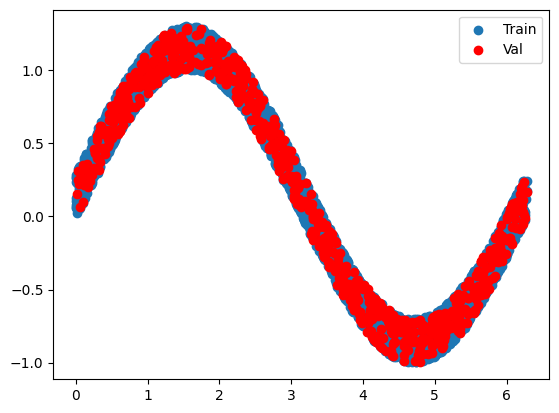

In [2]:
X = torch.rand(5000)*2*torch.pi
Y = torch.sin(X) + torch.rand(5000)*0.3

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.15)

plt.scatter(X_train, y_train, label='Train')
plt.scatter(X_test, y_test, label='Val', c='red')
plt.legend()

In [3]:
X_train, X_test, y_train, y_test = X_train.view(-1, 1), X_test.view(-1, 1), y_train.view(-1, 1), y_test.view(-1, 1)

train_dataset = CustomDataset(X_train, y_train)
val_dataset = CustomDataset(X_test, y_test)

train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True, drop_last=True)
val_dataloader = DataLoader(val_dataset, batch_size=32, shuffle=True, drop_last=True)

# Base

In [4]:
base_model_1 = MLP() 
optimizer = torch.optim.Adam(base_model_1.parameters(), lr=0.001)
criterion = torch.nn.MSELoss()
trainer(base_model_1, train_dataloader, val_dataloader, optimizer, criterion, epochs=100, verbose=49)

base_model_2 = MLP() 
optimizer = torch.optim.Adam(base_model_2.parameters(), lr=0.001)
criterion = torch.nn.MSELoss()
trainer(base_model_2, train_dataloader, val_dataloader, optimizer, criterion, epochs=100, verbose=49)

base_model_3 = MLP() 
optimizer = torch.optim.Adam(base_model_3.parameters(), lr=0.001)
criterion = torch.nn.MSELoss()
trainer(base_model_3, train_dataloader, val_dataloader, optimizer, criterion, epochs=100, verbose=49)

base_model_4 = MLP() 
optimizer = torch.optim.Adam(base_model_4.parameters(), lr=0.001)
criterion = torch.nn.MSELoss()
trainer(base_model_4, train_dataloader, val_dataloader, optimizer, criterion, epochs=100, verbose=49)

Epoch: 0 :::: Train loss 0.28486818075180054 :::: Val loss 0.16131673753261566 

Epoch: 49 :::: Train loss 0.009256472811102867 :::: Val loss 0.010611002333462238 

Epoch: 98 :::: Train loss 0.0081207025796175 :::: Val loss 0.00886249728500843 

Epoch: 0 :::: Train loss 0.3300149738788605 :::: Val loss 0.1994289606809616 

Epoch: 49 :::: Train loss 0.0086521590128541 :::: Val loss 0.008843309246003628 

Epoch: 98 :::: Train loss 0.008085161447525024 :::: Val loss 0.008296934887766838 

Epoch: 0 :::: Train loss 0.3623592257499695 :::: Val loss 0.21055379509925842 

Epoch: 49 :::: Train loss 0.009052932262420654 :::: Val loss 0.009105568751692772 

Epoch: 98 :::: Train loss 0.008134308271110058 :::: Val loss 0.008228562772274017 

Epoch: 0 :::: Train loss 0.555837094783783 :::: Val loss 0.33604639768600464 

Epoch: 49 :::: Train loss 0.008999448269605637 :::: Val loss 0.008700384758412838 

Epoch: 98 :::: Train loss 0.008080561645328999 :::: Val loss 0.008238673210144043 



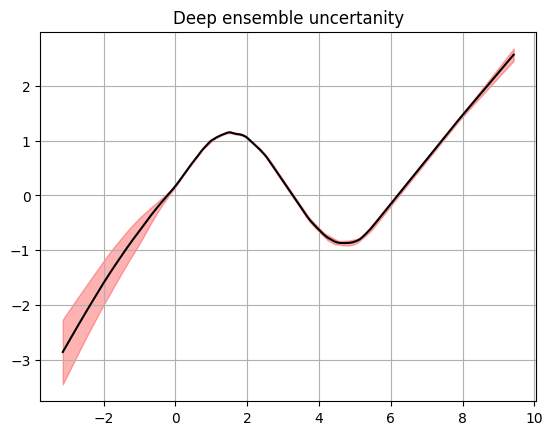

In [5]:
x_plot = torch.linspace(-1*np.pi,3*np.pi,200).view(-1, 1)

y_model = base_model_1(x_plot.to('cuda'))
y_model = torch.cat((y_model,base_model_2(x_plot.to('cuda'))),dim=1)
y_model = torch.cat((y_model,base_model_3(x_plot.to('cuda'))),dim=1)
y_model = torch.cat((y_model,base_model_4(x_plot.to('cuda'))),dim=1)

y_mean = torch.mean(y_model,dim=1).cpu().detach().numpy()
y_std = torch.std(y_model,dim=1).cpu().detach().numpy()

plot_uncertanity(x_plot, y_mean, y_std)

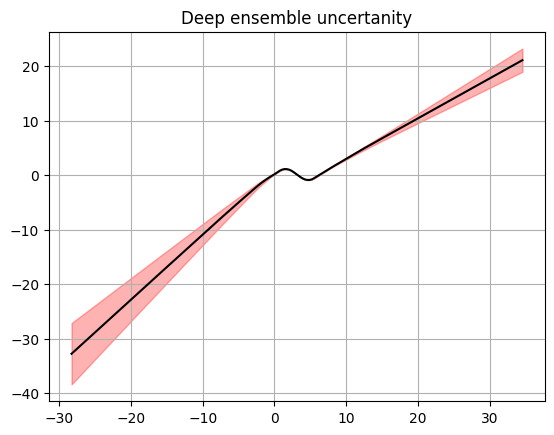

In [15]:
x_plot = torch.linspace(-9*np.pi,11*np.pi,200).view(-1, 1)

y_model = base_model_1(x_plot.to('cuda'))
y_model = torch.cat((y_model,base_model_2(x_plot.to('cuda'))),dim=1)
y_model = torch.cat((y_model,base_model_3(x_plot.to('cuda'))),dim=1)
y_model = torch.cat((y_model,base_model_4(x_plot.to('cuda'))),dim=1)

y_mean = torch.mean(y_model,dim=1).cpu().detach().numpy()
y_std = torch.std(y_model,dim=1).cpu().detach().numpy()

plot_uncertanity(x_plot, y_mean, y_std)

# Masksemble

In [6]:
mask_model = MLP_Maksembles(2,6) 
optimizer = torch.optim.Adam(mask_model.parameters(), lr=0.001)
criterion = torch.nn.MSELoss()
trainer(mask_model, train_dataloader, val_dataloader, optimizer, criterion, epochs=100, verbose=10)

Epoch: 0 :::: Train loss 0.4894404709339142 :::: Val loss 0.31203287839889526 

Epoch: 10 :::: Train loss 0.0744595006108284 :::: Val loss 0.07572830468416214 

Epoch: 20 :::: Train loss 0.032647375017404556 :::: Val loss 0.03391129523515701 

Epoch: 30 :::: Train loss 0.01575198955833912 :::: Val loss 0.015622694976627827 

Epoch: 40 :::: Train loss 0.010376199148595333 :::: Val loss 0.011027533560991287 

Epoch: 50 :::: Train loss 0.008811497129499912 :::: Val loss 0.008968833833932877 

Epoch: 60 :::: Train loss 0.008313952945172787 :::: Val loss 0.008280014619231224 

Epoch: 70 :::: Train loss 0.008382417261600494 :::: Val loss 0.008743281476199627 

Epoch: 80 :::: Train loss 0.008183925412595272 :::: Val loss 0.008251192979514599 

Epoch: 90 :::: Train loss 0.008172339759767056 :::: Val loss 0.008554224856197834 



# Dropout

In [8]:
drop_model = MLP_Dropout() 
optimizer = torch.optim.Adam(drop_model.parameters(), lr=0.001)
criterion = torch.nn.MSELoss()
trainer(drop_model, train_dataloader, val_dataloader, optimizer, criterion, epochs=100, verbose=99)

Epoch: 0 :::: Train loss 0.3961217701435089 :::: Val loss 0.15203365683555603 

Epoch: 99 :::: Train loss 0.03929497301578522 :::: Val loss 0.015473337844014168 



In [9]:
#Activando dropout en inferencia
drop_model.eval()
for m in drop_model.modules():
  if m.__class__.__name__.startswith('Dropout'):
    m.train()

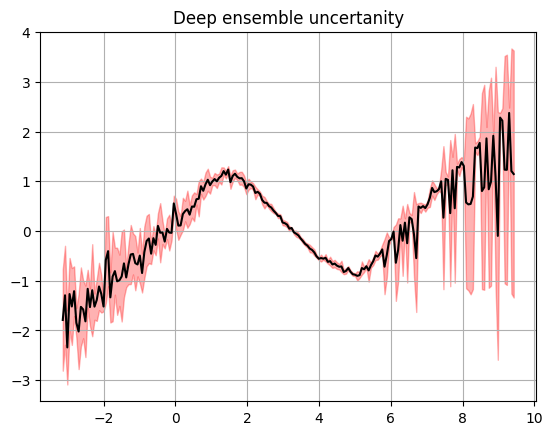

In [10]:
x_plot = torch.linspace(-np.pi,3*np.pi,200).view(-1, 1)

y_model = drop_model(x_plot.to('cuda'))
y_model = torch.cat((y_model,drop_model(x_plot.to('cuda'))),dim=1)
y_model = torch.cat((y_model,drop_model(x_plot.to('cuda'))),dim=1)
y_model = torch.cat((y_model,drop_model(x_plot.to('cuda'))),dim=1)

y_mean = torch.mean(y_model,dim=1).cpu().detach().numpy()
y_std = torch.std(y_model,dim=1).cpu().detach().numpy()

plot_uncertanity(x_plot, y_mean, y_std)

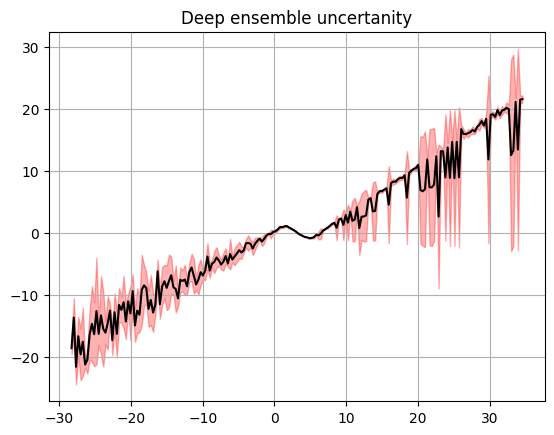

In [16]:
x_plot = torch.linspace(-9*np.pi,11*np.pi,200).view(-1, 1)

y_model = drop_model(x_plot.to('cuda'))
y_model = torch.cat((y_model,drop_model(x_plot.to('cuda'))),dim=1)
y_model = torch.cat((y_model,drop_model(x_plot.to('cuda'))),dim=1)
y_model = torch.cat((y_model,drop_model(x_plot.to('cuda'))),dim=1)

y_mean = torch.mean(y_model,dim=1).cpu().detach().numpy()
y_std = torch.std(y_model,dim=1).cpu().detach().numpy()

plot_uncertanity(x_plot, y_mean, y_std)